<a href="https://colab.research.google.com/github/PhillipTodorov/GoogleColabRepo/blob/master/melbourne_housing_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"philliptodorov","key":"98f038878193d56584943681996416f3"}'}

In [0]:
!pip install -q kaggle
!pip install q keras==2.2.4

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets download -d anthonypino/melbourne-housing-market

melbourne-housing-market.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
import os

os.mkdir('melbourne-housing-market')

In [0]:
import zipfile
with zipfile.ZipFile("/content/melbourne-housing-market.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/melbourne-housing-market")

In [0]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [0]:
import pandas as pd

df = pd.read_csv("/content/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv")
df= df.dropna()

df1 = df[['Rooms', 'Postcode', 'Propertycount', 'Distance']].values

df2 = df[['Price']].values

In [0]:
from keras.datasets import boston_housing

(test_data, test_targets), (train_data, train_targets) = boston_housing.load_data()

In [0]:
len(df1)

48433

In [0]:
len(df2)

48433

In [0]:
df2

array([[1490000.],
       [1220000.],
       [1420000.],
       ...,
       [ 566000.],
       [ 500000.],
       [ 545000.]])

In [0]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(df1, df2, test_size=0.2)


In [0]:
#normalizing the data 

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std


In [0]:
from keras import models, layers

import numpy as np

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

  

In [0]:
k = 1
num_val_samples = len(train_data) // k 
num_epochs = 500
all_histories = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                     train_data[(i + 1) * num_val_samples:]],
                                     axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                         train_targets[(i + 1) * num_val_samples:]],
                                        axis=0)
  
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
           epochs=num_epochs, batch_size=1, verbose=0)  
  pred = model.predict(val_data)

  all_histories.append(pred)

processing fold # 0


In [0]:
average_mae_history = [np.mean([x[i] for x in all_histories]) for i in range(num_epochs)]

In [0]:
average_mae_history

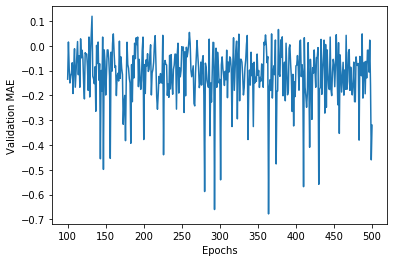

In [0]:
import matplotlib.pyplot as plt

plt.plot(range(100, len(average_mae_history) + 1), average_mae_history[99:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [0]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

404/404 [==============================] - 1s 2ms/step


In [0]:
test_mae_score

3.578304106646245

In [0]:
history.history['loss']